# Исследование объявлений о продаже квартир

Цель данного исследования - проведение анализа данных архива объявлений о продаже квартир в Санкт_Петербурге. Результаты данного исследования помогут создать автоматизированную систему по определению рыночной стоимости недвижимости.

Основные задачи:<br>
    1. Знакомство с данными. Общий обзор, предварительное знакомство с типами данных, наличием пропусков.<br>
    2. Предварительная обработка данных.<br>
        2.1 Поиск пропусков, заполнение пропусков приемлемыми данными, где это возможно.<br>
        2.2 Поиск и удаление явных дубликатов.<br>
        2.3 Преобразование типов данных, где это необходимо.<br>
        2.4 Поиск и обработка неявных дубликатов.<br>
        2.5 Расчёт дополнительных данных для проведения исследовательского анализа данных.<br>
    3. Проведение исследовательского анализа данных.<br>
        3.1 Анализ данных по различным параметрам (построение графиков) для определения границ фильтрации данных.<br>
        3.2 Обработка выдающихся значений<br>
        3.3 Определение степени влияния различных факторов на стоимость объектов недвижимости.<br>
        3.4 Анализ влияния места расположения объекта недвижимости на стоимость.<br>
        3.5 Анализ влияния удалённости от центра города на стоимость.<br>
    4. Выводы по результатам исследования.<br>

## Общая информация о данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [2]:
try:
    data = pd.read_csv('C:/Users/Azerty/Downloads/real_estate_data.csv', sep='\t')

except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')

In [3]:
display(data.head(15))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [5]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


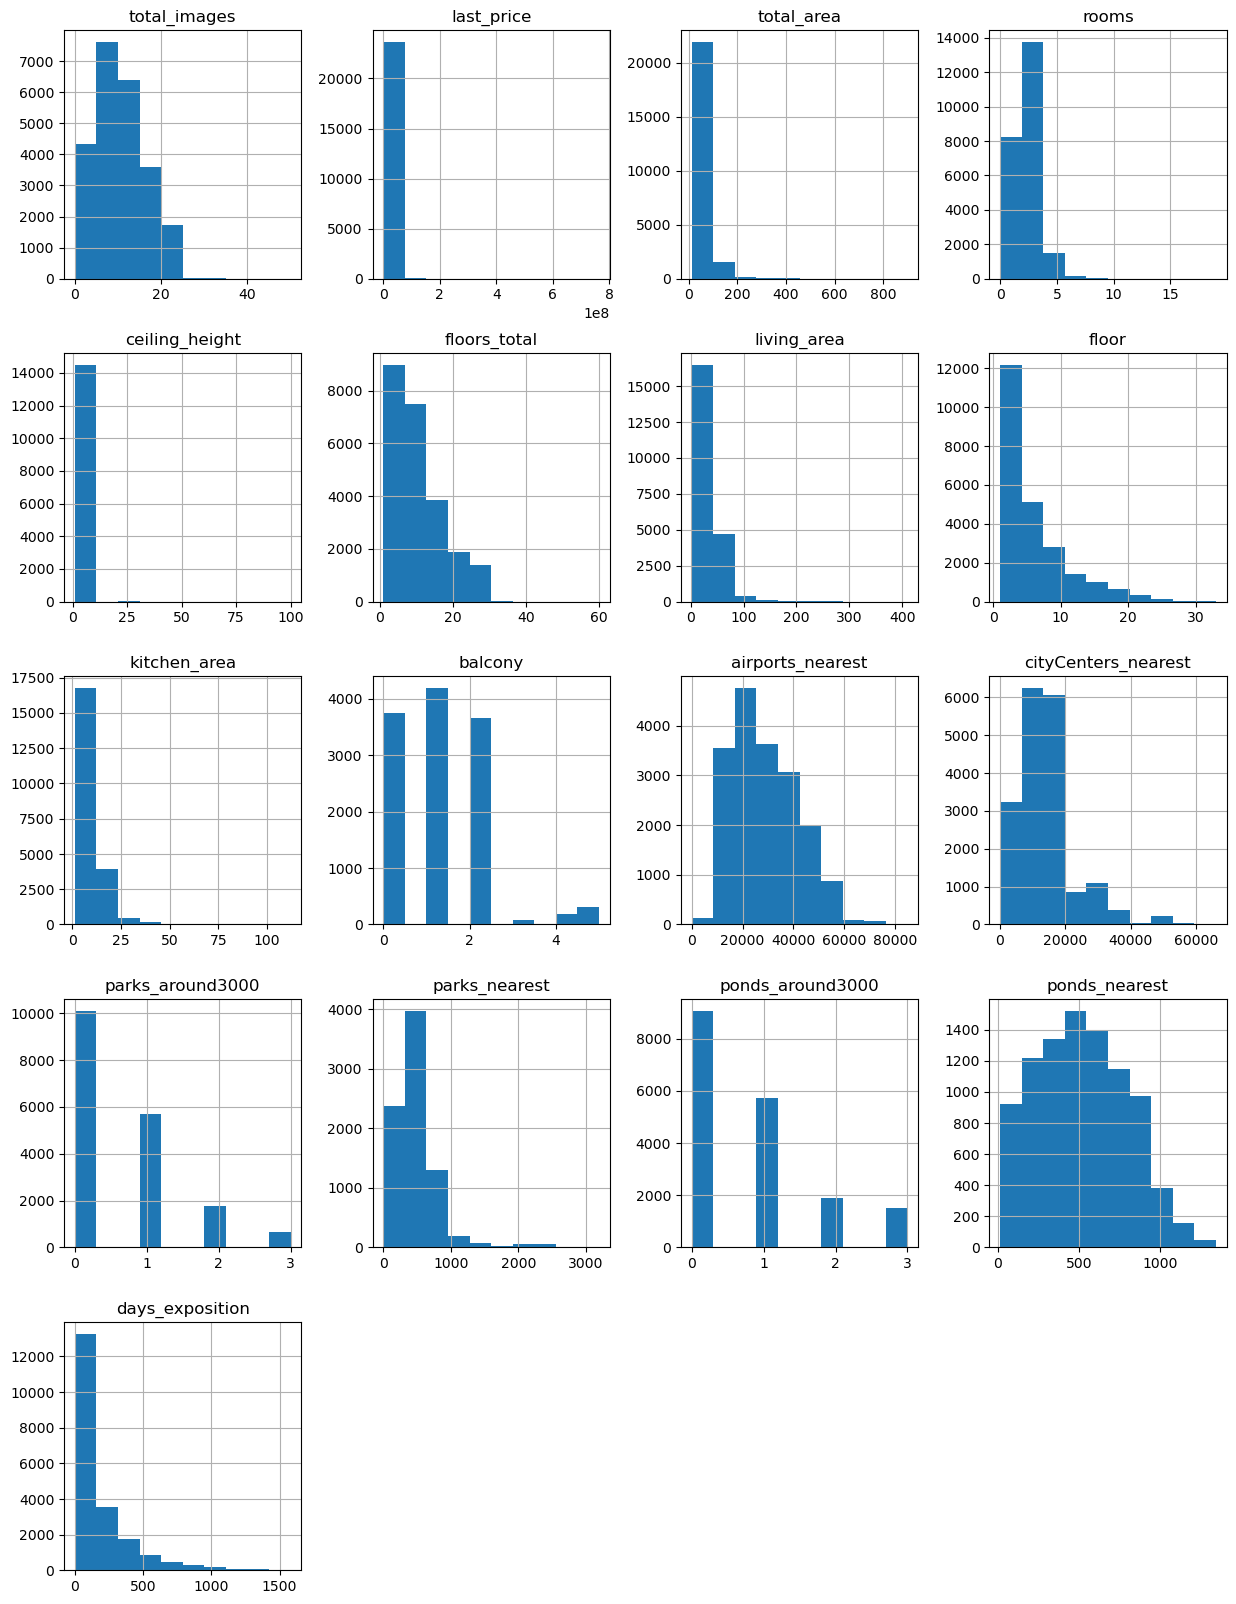

In [6]:
data.hist(figsize=(15, 20));

**Первоначальный обзор данных показал необходимость предварительной обработки данных. В данных присутствуют пропуски, аномальные значения, выборки по факторам неоднородны. Требуется изменение типа данных по некоторым факторам.**

## Предварительная обработка данных

### Поиск и обработка пропусков

Найдём количество пропусков для каждого стобца

In [7]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Пропуски в данных могли появиться вследствие человеческого фактора - при составлении объявления не были заполнены некоторые столбцы, а также вследствие технической ошибки - из-за некорректной работы геосервисов или при переносе данных.

Часть пропусков предлагается заменить на ноль. Так, например, пропуски в столбцах о наличии балкона, парка или водоёма в округе могут свидетельствовать об их отсутствии. Количество этажей в доме можно заменить на медианное значение. Как правило при продаже имеет значение, первый этаж и последний. Так как в случае пропусков мы всё равно не знаем является ли он первым или последним, можно заменить на другое значение, которое не является ни тем, ни другим.

In [8]:
data['balcony'] = data['balcony'].fillna(0)
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)



Также можно предположить, что пропуски в стобце is_apartment говорят о том, что данный объект недвижимости не является апартаментами. В таком случае пропуски можно заменить на False.

In [9]:
data['is_apartment'] = data['is_apartment'].fillna(False)

Заменим пропуски в столбце расстояние до аэропорта медианным значением расстояния до аэропорта по каждому населённому пункту. А пропуски в жилой площади и площади кухни медианными значениями по каждой общей площади.

In [10]:
for d in data['locality_name'].unique():
    data.loc[(data['locality_name'] == d) & (data['airports_nearest'].isna()), 'airports_nearest'] = \
    data.loc[(data['locality_name'] == d), 'airports_nearest'].median()

In [11]:
for l in data['total_area'].unique():
    data.loc[(data['total_area'] == l) & (data['living_area'].isna()), 'living_area'] = \
    data.loc[(data['total_area'] == l), 'living_area'].mean()    

In [12]:
for k in data['total_area'].unique():
    data.loc[(data['total_area'] == k) & (data['kitchen_area'].isna()), 'kitchen_area'] = \
    data.loc[(data['total_area'] == k), 'kitchen_area'].mean()

In [13]:
def check(row):
    total_area = row['total_area']
    living_area = row['living_area']
    kitchen_area = row['kitchen_area']
    
    if total_area*0.5 <= (living_area + kitchen_area) <= total_area*0.9:
        return 1
    else:
        return 0

data['check'] = data.apply(check, axis=1)

In [14]:
data['check'].unique()

array([1, 0], dtype=int64)

In [15]:
display(data['check'].count())
data['check'].sum()

23699

22645

In [16]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area               143
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area              205
balcony                     0
locality_name              49
airports_nearest         5394
cityCenters_nearest      5519
parks_around3000            0
parks_nearest           15620
ponds_around3000            0
ponds_nearest           14589
days_exposition          3181
check                       0
dtype: int64

### Изменение типов данных

Тип данных в столбцах balcony, parks_around3000, ponds_around3000 можно заменить на int, т.к. эти значения могут быть только целочисленными.

In [17]:
data = data.astype({'balcony':'int', 'parks_around3000':'int', 'ponds_around3000':'int'})

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           23556 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23494 non-null  float64
 13  balcony               23699 non-null  int32  
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Тип данных в столбце first_day_exposition следует заменить на datetime 

In [19]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S')

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           23556 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23494 non-null  float64       
 13  balcony         

### Обработка дубликатов

In [21]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [22]:
data['locality_name'] = (
    data['locality_name']
    .replace(['поселок'], 'посёлок', regex=True)
)

In [23]:
data['locality_name'] = data['locality_name']\
.replace('Мурино', 'посёлок Мурино')\
.replace('деревня Фёдоровское', 'городской посёлок Фёдоровское')\
.replace('поселок городского типа Советский', 'городской посёлок Советский')\
.replace('поселок Рябово', 'посёлок городского типа Рябово')\
.replace('поселок станции Вещево', 'посёлок при железнодорожной станции Вещево')\
.replace('поселок станции Приветнинское', 'посёлок при железнодорожной станции Приветнинское')\
.replace('поселок городского типа Назия', 'городской посёлок Назия')\
.replace('поселок Лесное', 'коттеджный посёлок Лесное')\
.replace('городской поселок Большая Ижора', 'поселок городского типа Большая Ижора')\
.replace('поселок Громово', 'посёлок станции Громово')\
.replace('поселок Кингисеппский', 'Кингисепп')\
.replace('деревня Рабитицы', 'поселок Рабитицы')\
.replace('Любань', 'посёлок Любань')\
.replace('деревня Гарболово', 'поселок Гарболово')\
.replace('садовое товарищество Приладожский', 'посёлок Любаньпоселок городского типа Приладожский')\
.replace('деревня Кузьмолово', 'посёлок городского типа Кузьмоловский')\
.replace('городской посёлок Мга', 'посёлок городского типа Мга')\
.replace('Коммунар', 'поселок Коммунары')\
.replace('деревня Зимитицы', 'поселок Зимитицы')\
.replace('садовое товарищество Рахья', 'поселок городского типа Рахья')\
.replace('деревня Щеглово', 'посёлок Щеглово')


In [24]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'поселок Коммунары',
       'Колпино', 'посёлок городского типа Красный Бор', 'Гатчина',
       'городской посёлок Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'посёлок Молодцово',
       'посёлок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'посёлок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'посёлок Торковичи', 'посёлок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 

In [25]:
data.duplicated().sum()

0

### Создание новых столбцов с дополнительными данными

Добавим новые столбцы в таблицу данных.

In [26]:
data['day'] = pd.DatetimeIndex(data['first_day_exposition']).day
data['month'] = pd.DatetimeIndex(data['first_day_exposition']).month
data['year'] = pd.DatetimeIndex(data['first_day_exposition']).year
data['price_per_meter'] = data['last_price']/data['total_area']
data['price_per_meter'] = round(data['price_per_meter'], 2)
data['cityCenters_nearest_km'] = data['cityCenters_nearest']/1000
data['cityCenters_nearest_km'] = round(data['cityCenters_nearest_km'], 0)



In [27]:
def categorize_floor(row):
    floor = row['floor']
    floors_total = row['floors_total']
    if floor == 1:
        return 'первый'
    if floor == floors_total:
        return 'последний'
    if 1 < floor < floors_total:
        return 'другой'
    
data['floor_category'] = data.apply(categorize_floor, axis=1)


In [28]:
data['floor_category'].unique()

array(['другой', 'первый', 'последний', None], dtype=object)

**После предварительной обработки данных можно приступить к исследовательскому анализу данных.**

## Исследовательский анализ данных

### Анализ различных характеристик

Построим гистограммы для данных каждого столбца.

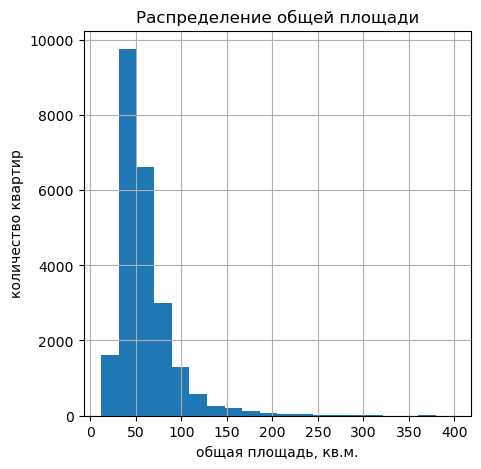

In [29]:
data = data.query('total_area < 400')
data['total_area'].hist(bins=20, figsize=(5, 5))
plt.title('Распределение общей площади')
plt.xlabel('общая площадь, кв.м.')
plt.ylabel('количество квартир');

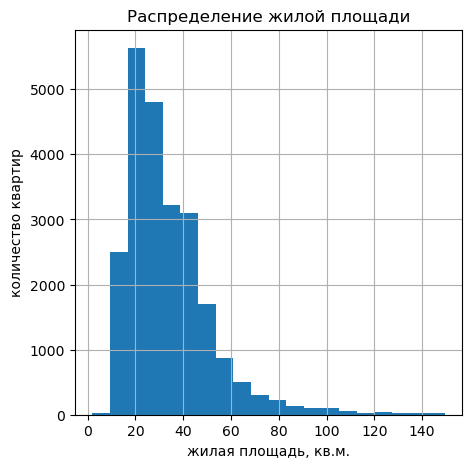

In [30]:
data = data.query('(living_area < 150) or (living_area != living_area)')
data['living_area'].hist(bins=20, figsize=(5, 5))
plt.title('Распределение жилой площади')
plt.xlabel('жилая площадь, кв.м.')
plt.ylabel('количество квартир');

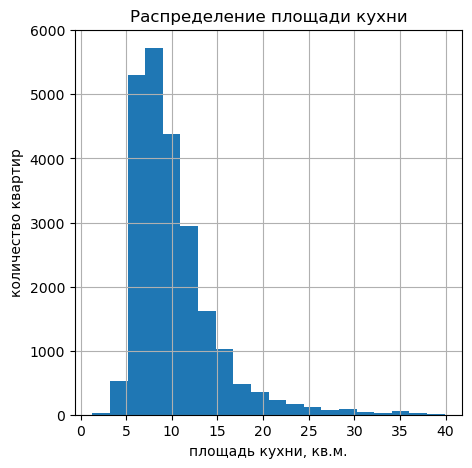

In [31]:
data = data.query('(kitchen_area < 40) or (kitchen_area != kitchen_area)')
data['kitchen_area'].hist(bins=20, figsize=(5, 5))
plt.title('Распределение площади кухни')
plt.xlabel('площадь кухни, кв.м.')
plt.ylabel('количество квартир');

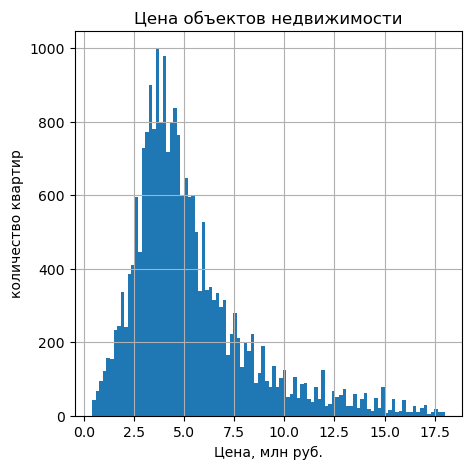

In [32]:
data['last_price'] = data['last_price'] / 1000000
data = data.query('(last_price < 18) or (last_price != last_price)')
data['last_price'].hist(bins=100, figsize=(5, 5))
plt.title('Цена объектов недвижимости')
plt.xlabel('Цена, млн руб.')
plt.ylabel('количество квартир');

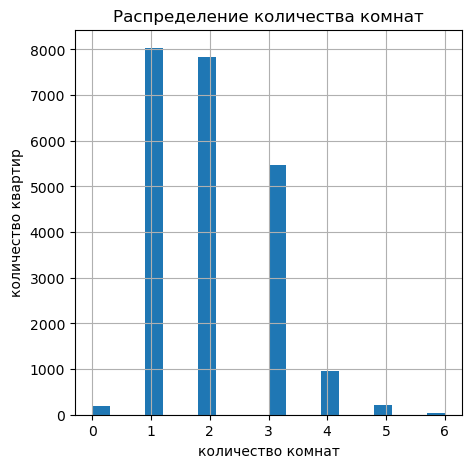

In [33]:
data = data.query('rooms < 7')
data['rooms'].hist(bins=20, figsize=(5, 5))
plt.title('Распределение количества комнат')
plt.xlabel('количество комнат')
plt.ylabel('количество квартир');

In [34]:
data['ceiling_height'].unique()

array([  2.7 ,    nan,   2.5 ,   2.67,   2.56,   3.05,   2.75,   2.6 ,
         2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   2.61,   3.2 ,   3.25,
         3.45,   2.77,   2.64,   2.57,   4.15,   2.71,   4.  ,   2.47,
         2.73,   2.84,   3.1 ,   2.34,   3.4 ,   2.72,   2.54,   2.51,
         2.78,   2.76,  25.  ,   2.58,   3.7 ,   2.52,   3.3 ,   3.5 ,
         2.87,   2.66,   2.59,   2.  ,   2.85,   2.45,   2.92,   3.11,
         3.13,   3.8 ,   3.15,   3.55,   3.62,   3.12,   2.53,   2.46,
         2.74,   5.  ,   2.79,   2.95,   4.06,   2.94,   3.54,   2.83,
         2.4 ,   3.38,   3.01,   3.65,   3.35,   2.3 ,   2.48,   2.62,
         3.57,   2.82,   3.98,   3.03,   2.63,   3.83,   3.52,   3.75,
         2.88,   3.67,   3.87,   3.66,   4.19,   3.95,   4.8 ,   4.5 ,
         4.2 ,   3.36,  32.  ,   3.68,   3.07,   3.37,   3.09,   8.  ,
         3.16,   3.6 ,   3.26,   3.34,   2.81,   3.44,   2.97,   4.37,
         2.68,   3.9 ,   3.22,   3.27,  27.  ,   4.1 ,   2.93,   3.46,
      

In [35]:
data['ceiling_height'] = data['ceiling_height']\
.replace(25, 2.5)\
.replace(27, 2.7)\
.replace(27.5, 2.75)\
.replace(32, 3.2)


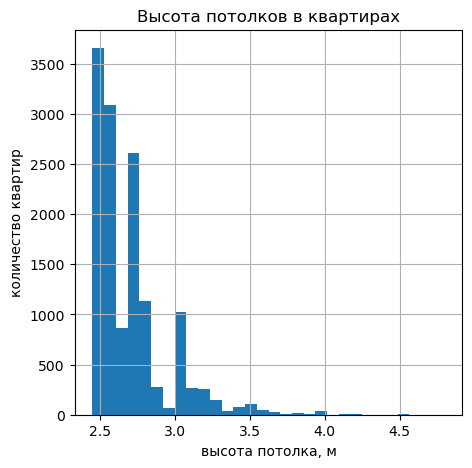

In [36]:
data = data.query('(2.4 < ceiling_height < 5) or (ceiling_height != ceiling_height)')
data['ceiling_height'].hist(bins=30, figsize=(5, 5))
plt.title('Высота потолков в квартирах')
plt.xlabel('высота потолка, м')
plt.ylabel('количество квартир');

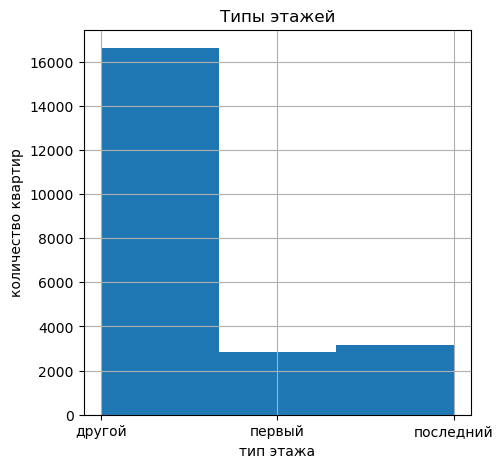

In [37]:

data['floor_category'].hist(bins=3, figsize=(5, 5))
plt.title('Типы этажей')
plt.xlabel('тип этажа')
plt.ylabel('количество квартир');

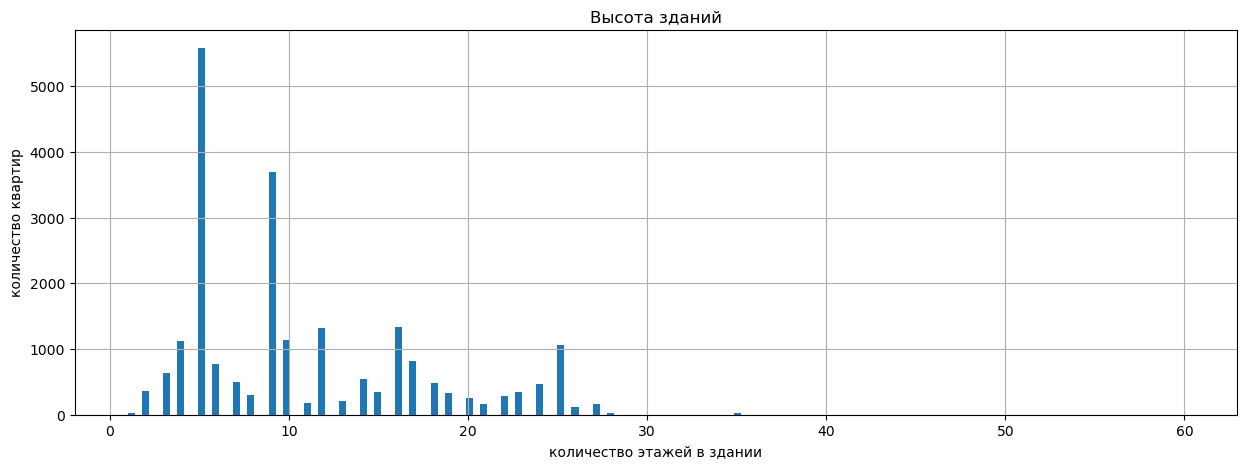

In [38]:
data['floors_total'].hist(bins=150, figsize=(15, 5))
plt.title('Высота зданий')
plt.xlabel('количество этажей в здании')
plt.ylabel('количество квартир');

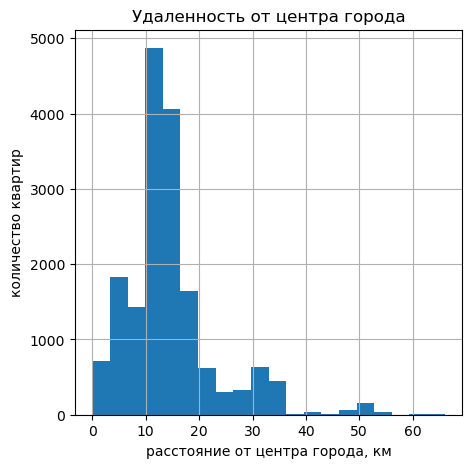

In [39]:
data['cityCenters_nearest_km'].hist(bins=20, figsize=(5, 5))
plt.title('Удаленность от центра города')
plt.xlabel('расстояние от центра города, км')
plt.ylabel('количество квартир');

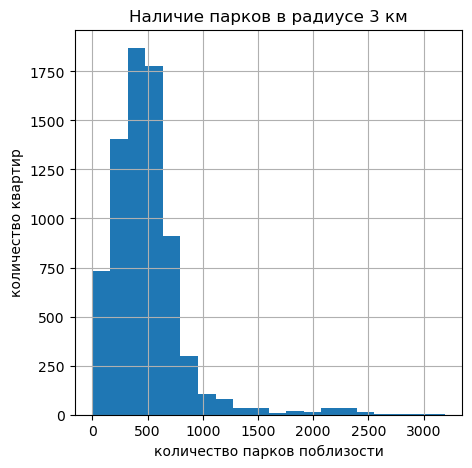

In [40]:
data['parks_nearest'].hist(bins=20, figsize=(5, 5))
plt.title('Наличие парков в радиусе 3 км')
plt.xlabel('количество парков поблизости')
plt.ylabel('количество квартир');

Основную часть базы данных объявлений составляют квартиры площадью от 25 до 75 кв.м., жилой площадью от 12 до 50 кв.м. и площадью кухни от 5 до 14 кв.м., c 1-3 комнатами и высотой потолков 2,4 - 3.2 м. Большая часть квартир находится в невысоких домах (до 10 этажей), не на первом и не на последнем этажах, досточно недалеко от центра города.

### Анализ скорости продаж

Проанализируем, как быстро продавались квартиры.

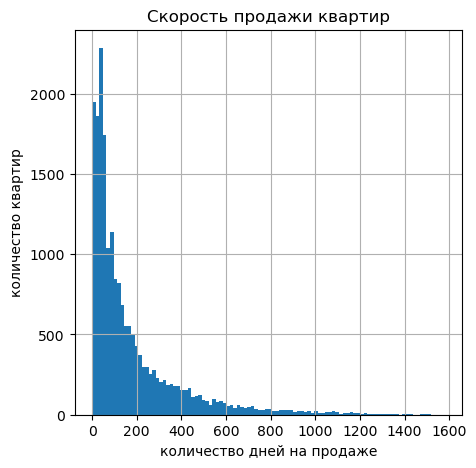

In [41]:
data['days_exposition'].hist(bins=100, figsize=(5, 5))
plt.title('Скорость продажи квартир')
plt.xlabel('количество дней на продаже')
plt.ylabel('количество квартир');

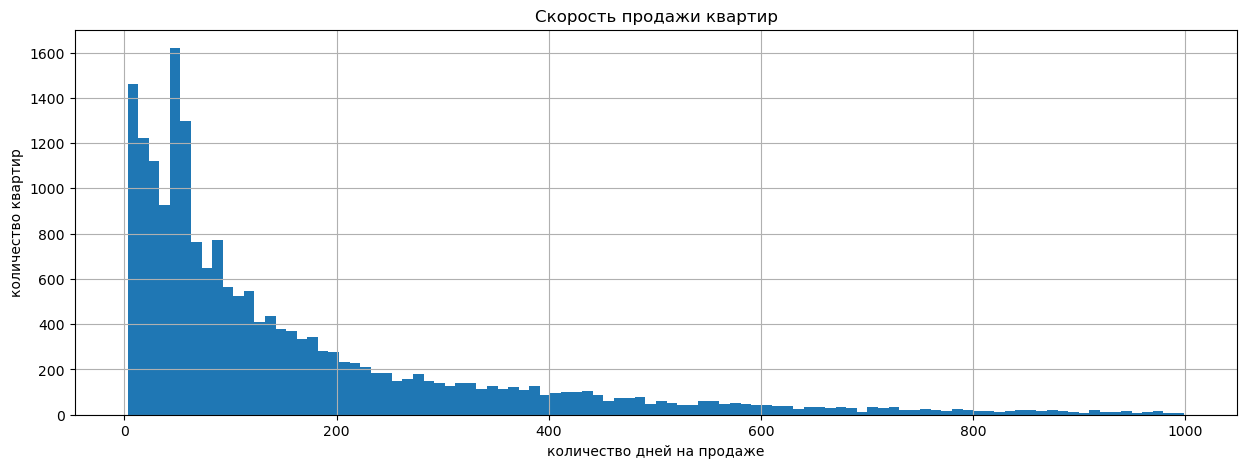

In [42]:
data = data.query('(2 < days_exposition < 1000) or (days_exposition != days_exposition)')
data['days_exposition'].hist(bins=100, figsize=(15, 5))
plt.title('Скорость продажи квартир')
plt.xlabel('количество дней на продаже')
plt.ylabel('количество квартир');

In [43]:
display(data['days_exposition'].mean())
display(data['days_exposition'].median())

164.810547875064

92.0

In [44]:
data_pivot_y = data.pivot_table(index='year', values='days_exposition', aggfunc='mean')
data_pivot_y

,days_exposition
year,
2014,704.225806
2015,533.540416
2016,310.864539
2017,156.892393
2018,93.356367
2019,30.928030


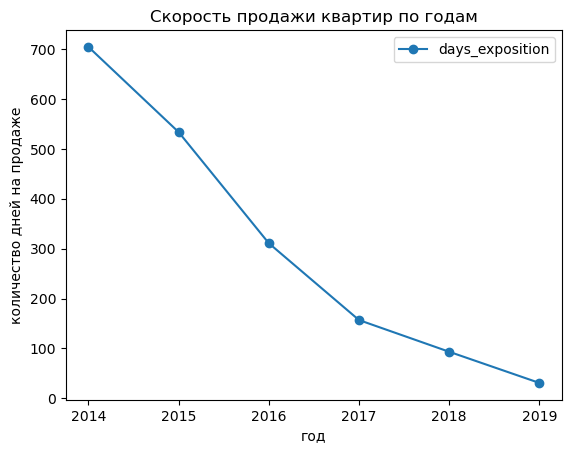

In [45]:
data_pivot_y.plot(style='o-')
plt.title('Скорость продажи квартир по годам')
plt.xlabel('год')
plt.ylabel('количество дней на продаже');

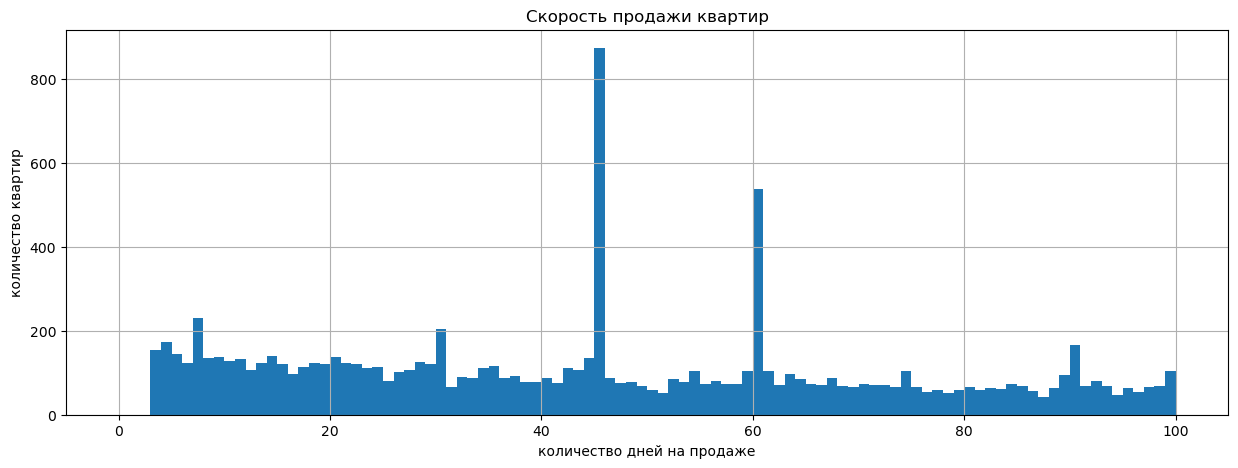

In [46]:
data['days_exposition'].hist(bins=100, figsize=(15, 5), range=(0, 100))
plt.title('Скорость продажи квартир')
plt.xlabel('количество дней на продаже')
plt.ylabel('количество квартир');

Пиковые значения скорости продаж (количество дней на продаже) приходятся на 45 и 60 дней - это срок подачи бесплатного объявления в зависимости от цены объекта недвижимости: до 4,5 млн рублей и от 4,5 до 10 млн рублей соответственно.

In [47]:
data['days_exposition'].describe()

count    19530.000000
mean       164.810548
std        185.603390
min          3.000000
25%         44.000000
50%         92.000000
75%        217.000000
max        999.000000
Name: days_exposition, dtype: float64

**Максимальное количество продаж приходятся на сроки, близкие к 45 и 60 дням - это срок бесплатного объявления на сервисе.<br>
Быстрыми можно считать продажи сроком менее 44 дней (25-й квантиль), слишком медленными - сроком более 217 дней (75-й квантиль).<br>
Кроме того, можно отметить тенденцию на сокращение сроков продаж от года к году. Можно предположить, что это связано с изменением условий размещения объявлений - сокращением сроков и количества бесплатных объявлений.**

### Анализ зависимости цены от различных факторов

Проанализируем зависимость цены от различных параметров.

Зависимость цены от общей площади квартиры.

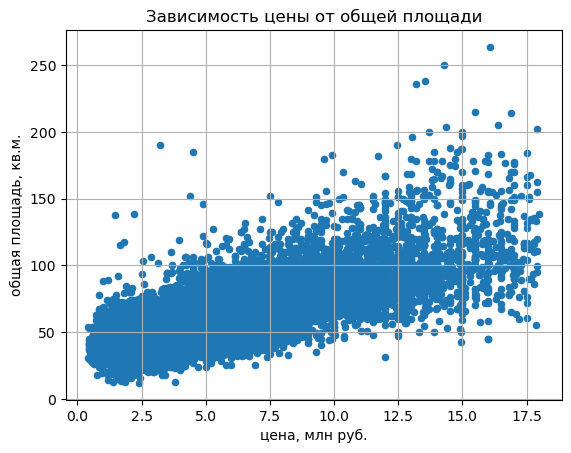

In [48]:
data.plot(y='total_area', x='last_price', kind='scatter', grid=True)
plt.title('Зависимость цены от общей площади')
plt.xlabel('цена, млн руб.')
plt.ylabel('общая площадь, кв.м.');

In [49]:
display('Коэффициент корреляции составляет', data['last_price'].corr(data['total_area']))

'Коэффициент корреляции составляет'

0.7602535065846903

Зависимость цены от жилой площади квартиры.

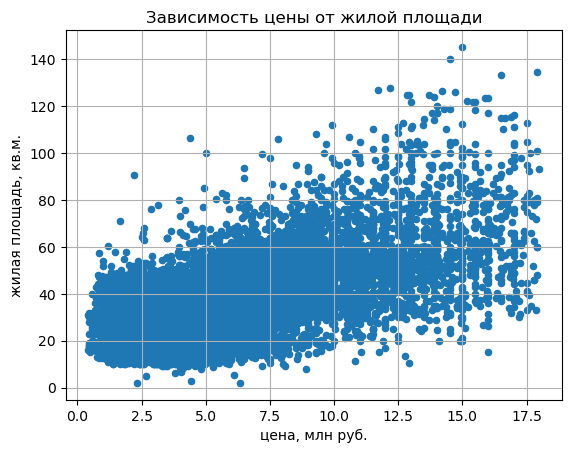

In [50]:
data.plot(y='living_area', x='last_price', kind='scatter', grid=True)
plt.title('Зависимость цены от жилой площади')
plt.xlabel('цена, млн руб.')
plt.ylabel('жилая площадь, кв.м.');

In [51]:
display('Коэффициент корреляции составляет', data['last_price'].corr(data['living_area']))

'Коэффициент корреляции составляет'

0.6565914724081638

Зависимость цены от площади кухни.

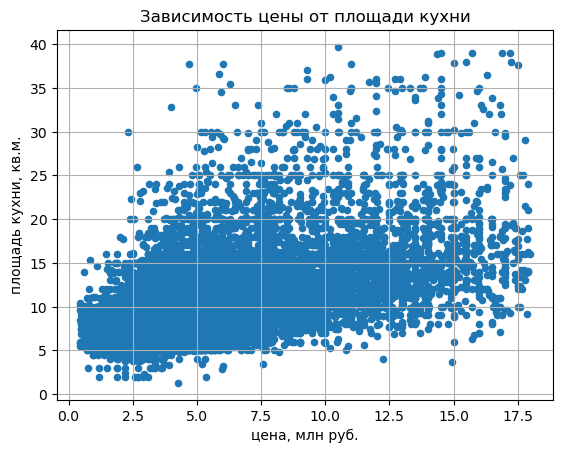

In [52]:
data.plot(y='kitchen_area', x='last_price', kind='scatter', grid=True)
plt.title('Зависимость цены от площади кухни')
plt.xlabel('цена, млн руб.')
plt.ylabel('площадь кухни, кв.м.');

In [53]:
display('Коэффициент корреляции составляет', data['last_price'].corr(data['kitchen_area']))

'Коэффициент корреляции составляет'

0.5638042895446658

Зависимость цены от количества комнат.

,mean_last_price
rooms,
0,2.965803
1,3.782818
2,5.272441
3,6.748178
4,8.442835
5,10.778291
6,12.812078


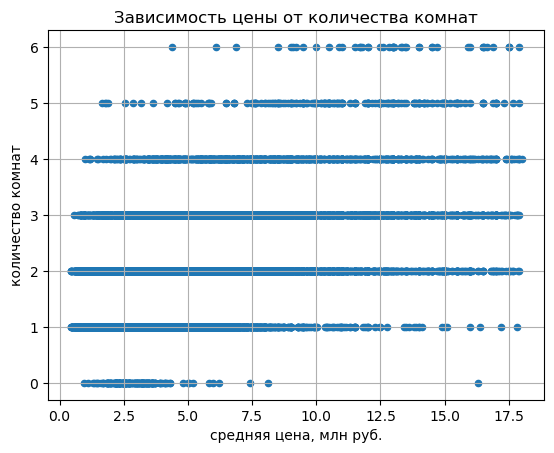

In [54]:
data_pivot4 = data.pivot_table(index='rooms', values='last_price', aggfunc=['mean'])
data_pivot4.columns = ['mean_last_price']
display(data_pivot4.head(10))
data.plot(y='rooms', x='last_price', kind='scatter', grid=True)
plt.title('Зависимость цены от количества комнат')
plt.xlabel('средняя цена, млн руб.')
plt.ylabel('количество комнат');

Зависимость цены от типа этажа.

In [55]:
data_pivot5 = data.pivot_table(index='floor_category', values='last_price', aggfunc=['mean'])
data_pivot5.columns = ['mean_last_price']
display(data_pivot5)


,mean_last_price
floor_category,
другой,5.498570
первый,4.307837
последний,4.961867


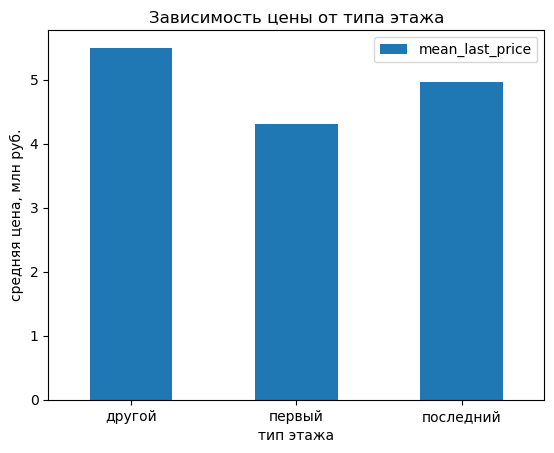

In [56]:
data_pivot5.plot(kind='bar')
plt.title('Зависимость цены от типа этажа')
plt.xlabel('тип этажа')
plt.ylabel('средняя цена, млн руб.')
plt.xticks(rotation=0);

Зависимость цены от дня подачи объявления.

,mean_last_price
day,
1,5.285164
2,5.168791
3,5.219295
4,5.564417
5,5.152244
6,5.015294
7,5.127475
8,5.381863
9,5.205642


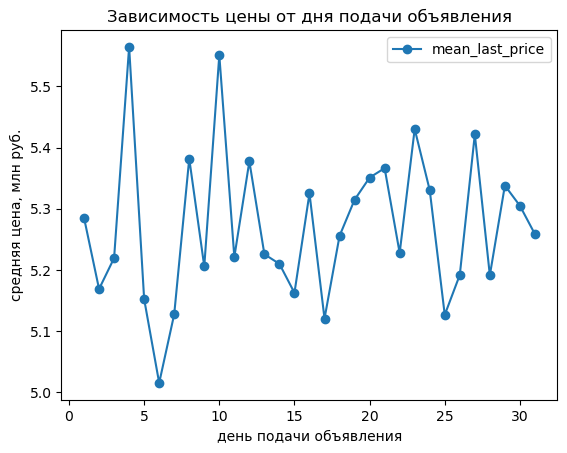

In [57]:
data_pivot6 = data.pivot_table(index='day', values='last_price', aggfunc=['mean'])
data_pivot6.columns = ['mean_last_price']
display(data_pivot6.head(10))
data_pivot6.plot(style='o-')
plt.title('Зависимость цены от дня подачи объявления')
plt.xlabel('день подачи объявления')
plt.ylabel('средняя цена, млн руб.');

Зависимость цены от месяца подачи объявления.

,mean_last_price
month,
1,5.285167
2,5.258797
3,5.294199
4,5.370010
5,5.247704
6,5.045063
7,5.241784
8,5.296896
9,5.422875


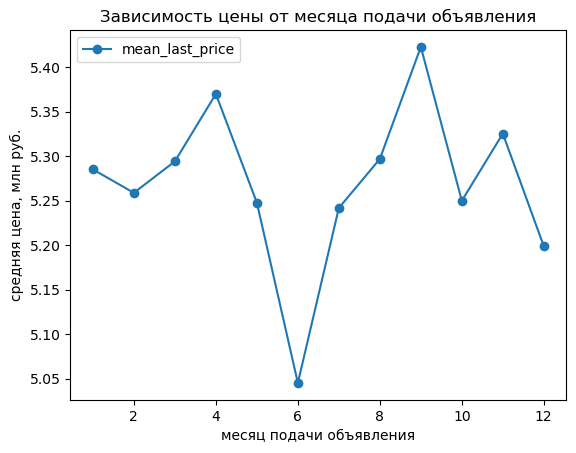

In [58]:
data_pivot7 = data.pivot_table(index='month', values='last_price', aggfunc=['mean'])
data_pivot7.columns = ['mean_last_price']
display(data_pivot7)
data_pivot7.plot(style='o-')
plt.title('Зависимость цены от месяца подачи объявления')
plt.xlabel('месяц подачи объявления')
plt.ylabel('средняя цена, млн руб.');

Зависимость цены от года подачи объявления.

,mean_last_price
year,
2014,7.448344
2015,5.745442
2016,5.288149
2017,5.199312
2018,5.168073
2019,5.594553


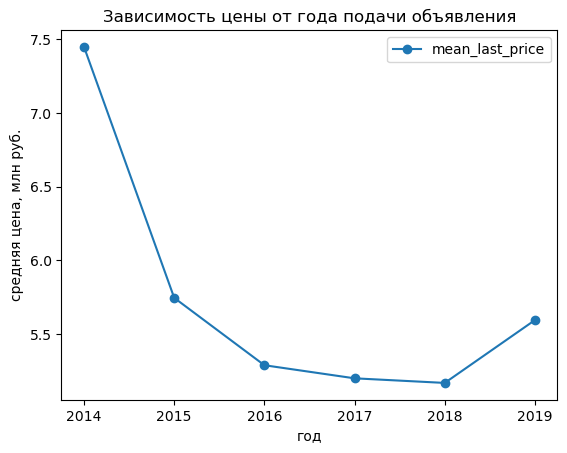

In [59]:
data_pivot8 = data.pivot_table(index='year', values='last_price', aggfunc=['mean'])
data_pivot8.columns = ['mean_last_price']
display(data_pivot8)
data_pivot8.plot(style='o-')
plt.title('Зависимость цены от года подачи объявления')
plt.xlabel('год')
plt.ylabel('средняя цена, млн руб.');

Рассмотрим дополнительные факторы, влияющие на стоимость.

Изменение количества объявлений и средней цены по годам

In [60]:
data_pivot_dop = data.pivot_table(index='year', values='last_price', aggfunc=['count', 'mean'])
data_pivot_dop.columns = ['count', 'mean_last_price']
display(data_pivot_dop)

,count,mean_last_price
year,,
2014,72,7.448344
2015,915,5.745442
2016,2623,5.288149
2017,7832,5.199312
2018,8230,5.168073
2019,2753,5.594553


Изменение средней общей площади по годам

In [61]:
data_pivot_dop1 = data.pivot_table(index='year', values='total_area', aggfunc=['mean'])
data_pivot_dop1.columns = ['mean_total_area']
display(data_pivot_dop1)

,mean_total_area
year,
2014,71.957083
2015,61.414601
2016,57.234419
2017,55.836387
2018,54.535463
2019,55.099873


Изменение средней цены за квадратный метр по годам

In [62]:
data_pivot_dop2 = data.pivot_table(index='year', values='price_per_meter', aggfunc=['mean'])
data_pivot_dop2.columns = ['mean_price_per_meter']
display(data_pivot_dop2)

,mean_price_per_meter
year,
2014,102130.974167
2015,92808.604721
2016,92175.245581
2017,92417.468899
2018,94424.465589
2019,101506.461166


**Из графиков видно, что цена больше всего коррелирует с общей площадью квартиры, немного меньше с жилой площадью квартиры и совсем немного с площадью кухни. А вот количество комнат не имеет влияния на стоимость. <br>
Стоит отметить также, чо цена на объекты, расположенные на первом и последнем этажах ниже, чем на остальных. <br>
Сложно определить зависимость цены от дня подачи объявления - скорее всего её нет. Однако цена зависит от месяца - так самые восокие цены наблюдаются весной, а самые низкие - летом. Также можно отметить провал цены в 2016-2018 годах.<br>
Также стоит отметить, что выборка неодородна по годам размещения объявлений, что может помешать сделать правильные выводы.
Кроме того, стоит отметить, что от года к году при небольшой разнице в общей цене имеется тренд на уменьшение общей площади продаваемых объектов.**

Определим 10 населённых пунктов с наибольшим количеством объявлений и рассчитаем среднюю цену за метр в них.

In [63]:
data_pivot9 = data.pivot_table(index='locality_name', values='price_per_meter', aggfunc=['count', 'mean'])
data_pivot9.columns = ['count', 'mean_price_per_meter']
display(data_pivot9.sort_values(by='count', ascending=False).head(10))


,count,mean_price_per_meter
locality_name,,
Санкт-Петербург,14582,108027.803169
посёлок Мурино,584,86192.525291
посёлок Шушары,435,78641.803287
Всеволожск,392,67307.298444
Пушкин,347,101884.444092
Колпино,334,75298.845808
посёлок Парголово,325,90259.743108
Гатчина,307,68746.146515
деревня Кудрово,294,92421.528673


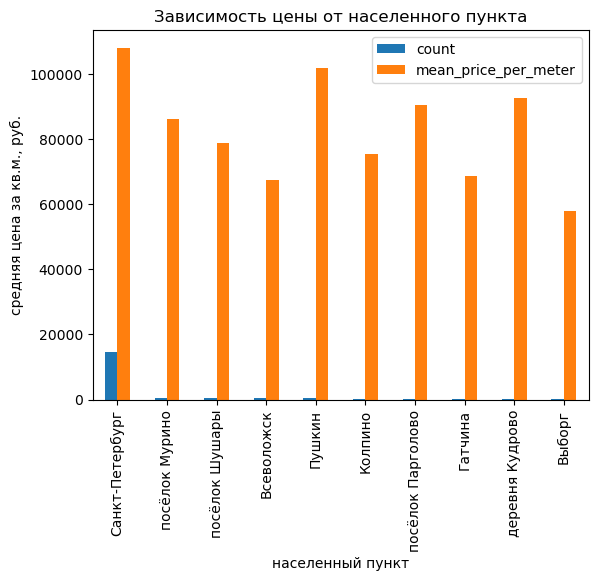

In [64]:
data_best = data_pivot9.sort_values(by='count', ascending=False).head(10)
data_best.plot(kind='bar')
plt.title('Зависимость цены от населенного пункта')
plt.xlabel('населенный пункт')
plt.ylabel('средняя цена за кв.м., руб.');

Самая высокая средняя цена за метр - в Санкт-Петербурге. Самая низкая - во Всёволожске.

Выделим квартиры на продаже в Санкт_петербурге.

In [65]:
data_spb = data[data['locality_name'] == 'Санкт-Петербург']
display(data_spb)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,check,day,month,year,price_per_meter,cityCenters_nearest_km,floor_category
0,20,13.000,108.00,2019-03-07,3,2.70,16.0,51.000000,8,False,...,2,755.0,NaN,1,7,3,2019,120370.37,16.0,другой
2,10,5.196,56.00,2015-08-20,2,NaN,5.0,34.300000,4,False,...,2,574.0,558.0,1,20,8,2015,92785.71,14.0,другой
7,5,7.915,71.60,2019-04-18,2,NaN,24.0,42.771429,22,False,...,0,NaN,NaN,1,18,4,2019,110544.69,12.0,другой
9,18,5.400,61.00,2017-02-26,3,2.50,9.0,43.600000,7,False,...,0,NaN,289.0,1,26,2,2017,88524.59,15.0,другой
10,5,5.050,39.60,2017-11-16,1,2.67,12.0,20.300000,3,False,...,2,553.0,137.0,1,16,11,2017,127525.25,14.0,другой
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23689,13,3.550,35.30,2018-02-28,1,2.86,15.0,16.300000,4,False,...,2,652.0,29.0,1,28,2,2018,100566.57,16.0,другой
23690,3,5.500,52.00,2018-07-19,2,NaN,5.0,31.000000,2,False,...,0,NaN,15.0,1,19,7,2018,105769.23,6.0,другой
23691,11,9.470,72.90,2016-10-13,2,2.75,25.0,40.300000,7,False,...,1,806.0,519.0,1,13,10,2016,129903.98,4.0,другой
23694,9,9.700,133.81,2017-03-21,3,3.70,5.0,73.300000,3,False,...,3,381.0,NaN,1,21,3,2017,72490.85,4.0,другой


Рассчитаем среднюю цену в зависимости от расстояния до центра города.

In [66]:
data_pivot10 = data_spb.pivot_table(index='cityCenters_nearest_km', values='last_price', aggfunc=['mean'])
data_pivot10.columns = ['mean_last_price']
display(data_pivot10.head(10))

,mean_last_price
cityCenters_nearest_km,
0.0,10.198571
1.0,9.976809
2.0,9.528013
3.0,8.656423
4.0,8.965401
5.0,8.903917
6.0,8.157847
7.0,7.593296
8.0,7.500279


Проанализируем зависимость цены от расстояния до центра города.

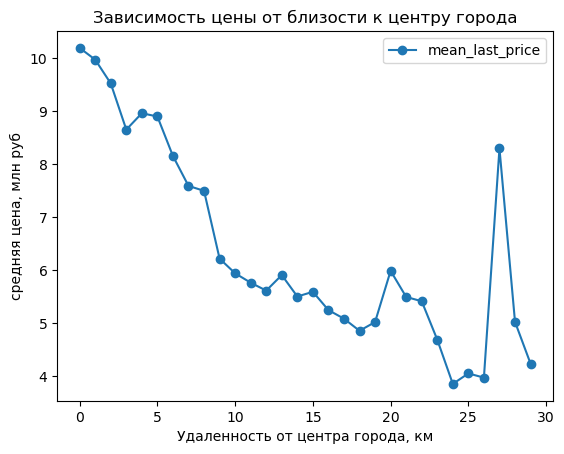

In [67]:
data_pivot10.plot(style='o-')
plt.title('Зависимость цены от близости к центру города')
plt.xlabel('Удаленность от центра города, км')
plt.ylabel('средняя цена, млн руб');

График показывает завиимость цены за метр от расстояния до центра, хотя существуют некоторые исключения. Так, мы видим провал цены на 3 км и пик цены на 27 км.

Рассмотрим соотношение различных категорий этажей, на которых продаются квартиры.

In [68]:
data_pivot_kmfc = data_spb.pivot_table(index=['cityCenters_nearest_km', 'floor_category'], values='last_price', aggfunc='count')
data_pivot_kmfc.columns = ['count']
data_pivot_kmfc

count
cityCenters_nearest_km floor_category       
0.0                    другой             10
                       первый              2
                       последний           2
1.0                    другой             87
                       первый             17
...                                      ...
28.0                   первый              2
                       последний           1
29.0                   другой              1
                       первый              4
                       последний           1

[89 rows x 1 columns]

Выберем интересующие нас аномальные зоны.

Рассмотрим соотношение категорий этажей на 3 км.

In [69]:
data_3km = data_pivot_kmfc.loc[3]
total_count = data_3km['count'].sum()
data_3km['ratio'] = data_3km['count'] / total_count * 100
data_3km

,count,ratio
floor_category,,
другой,183,60.797342
первый,50,16.611296
последний,68,22.591362


Рассмотрим соотношение категорий этажей на 27 км.

In [70]:
data_27km = data_pivot_kmfc.loc[27]
total_count = data_27km['count'].sum()
data_27km['ratio'] = data_27km['count'] / total_count * 100
data_27km

,count,ratio
floor_category,,
другой,1,50.0
последний,1,50.0


Рассмотрим соотношение категорий этажей, характерное для Санкт-Петербурга в целом

In [71]:
data_pivot13 = data_spb.pivot_table(index='floor_category', values='last_price', aggfunc=['count'])
data_pivot13.columns = ['count']
total_count = data_pivot13['count'].sum()
data_pivot13['ratio'] = data_pivot13['count'] / total_count * 100
data_pivot13

,count,ratio
floor_category,,
другой,11294,77.782369
первый,1521,10.475207
последний,1705,11.742424


Если посмотреть на долю объявлений на разных категориях этажей, выбросы становятся объяснимыми. <br>
На 3 км от центра доля кавртир, продаваемых на первом и последнем этажах, существенно выше средней по городу. Так как стоимость этих квартир ниже, то и средняя стоимость на 3 км ниже ожидаемой.<br>

In [72]:
data_pivot_t = data_spb.pivot_table(index='cityCenters_nearest_km', values='total_area', aggfunc='mean')
data_pivot_t.columns = ['mean_total_area']
data_27km_t = data_pivot_t.loc[27]
display(data_27km_t)
display(data_spb['total_area'].mean())

mean_total_area    53.0
Name: 27.0, dtype: float64

58.17983541352352

Доля других этажей на 27 км ниже, чем в среднем по городу, а значит это не могло привести к всплеску цены. Средняя общая площадь, которая больше всего влияет на цену, также ниже, чем по городу.

Рассмотрим срез данных по 27 км.

In [73]:
data_spb_27 = data_spb.query('cityCenters_nearest_km == 27')
data_spb_27

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,check,day,month,year,price_per_meter,cityCenters_nearest_km,floor_category
748,13,14.35,74.0,2017-11-28,2,3.13,5.0,30.0,3,False,...,0,NaN,128.0,1,28,11,2017,193918.92,27.0,другой
5961,6,2.25,32.0,2018-02-27,1,NaN,2.0,16.5,2,False,...,0,NaN,178.0,1,27,2,2018,70312.50,27.0,последний


В строке 748 находится, видимо, какая-то аномалия. По своим параметрам квартира ничем особо не выдается. Однако цена существенно завышена. Либо это ошибка ввода цены - лишний ноль и цена должна быть не 14.35 млн руб., а 1.43 млн руб. Либо это какая-то особенная квартира (нужно внимательно изучить фотографии :)

**Вывод. <br>
Целью данного исследования являлся анализ архива объявлений о продаже объектов недвижимости для поиска зависимости цены от различных факторов. <br>
В ходе первоначального анализа данных были выявлены пропуски и аномальные значения в данных.
Для их устранения была проведена предварительная обработка данных.<br>
Также была проведена обработка дублирующих значений и созданы новые столбцы с дополнительными данными, необходимыми для анализа.<br>
После обработки данных был проведён исследовательский анализ данных и выявлены закономерности влияния различных факторо на цену объектов недвижимости.<br>
Было отмечено, что больше всего на цену влияют общая площадь объекта. Также имеет значение категория этажа - первый и последний этаж снижают стоимость - и расстояние от центра города до объекта недвижимости.<br>
Помимо этого стоит отметить, что данные требуют более тщательного сбора и проверки перед анализом, так как большое количество пропусков и аномальных значений могло повлиять на данные анализа.<br>
Кроме того, выборка неоднородна по годам. Этот фактор также мог привести к искажению данных.**
